In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h4>KPI-1 Penetracion de internet cada 100 hogares por trimestre</h4>

In [2]:
dt = pd.read_csv('datasets/Internet_PenetracionPROV.csv')
dt.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,3,Buenos Aires,"78,11"
1,2022,3,Capital Federal,"122,28"
2,2022,3,Catamarca,"65,33"
3,2022,3,Chaco,"43,86"
4,2022,3,Chubut,"84,38"


In [9]:
print(dt.dtypes,'\n',dt.shape)

Año                              int64
Trimestre                        int64
Provincia                       object
Accesos por cada 100 hogares    object
dtype: object 
 (840, 4)


In [16]:
dt['Accesos por cada 100 hogares'] = [x.replace(',', '.') for x in dt['Accesos por cada 100 hogares']]
dt.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,3,Buenos Aires,78.11
1,2022,3,Capital Federal,122.28
2,2022,3,Catamarca,65.33
3,2022,3,Chaco,43.86
4,2022,3,Chubut,84.38


In [17]:
dt['Accesos por cada 100 hogares'] = dt['Accesos por cada 100 hogares'].astype('float64')
dt.dtypes

Año                               int64
Trimestre                         int64
Provincia                        object
Accesos por cada 100 hogares    float64
dtype: object

In [10]:
dt[dt.duplicated()]

,Año,Trimestre,Provincia,Accesos por cada 100 hogares


In [11]:
dt.isnull().sum()

Año                             0
Trimestre                       0
Provincia                       0
Accesos por cada 100 hogares    0
dtype: int64

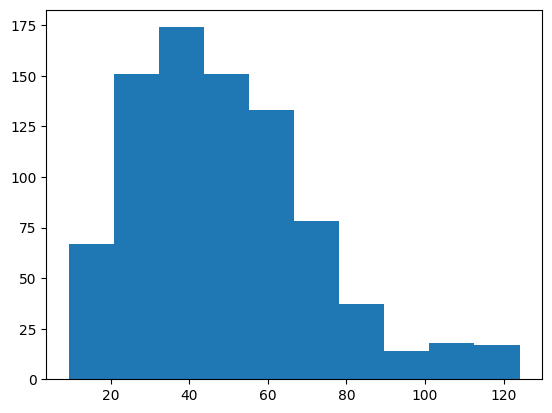

In [22]:
plt.hist(dt['Accesos por cada 100 hogares'])
plt.show()

In [130]:
def MeanGrowthPerProv():
    x = dt['Accesos por cada 100 hogares'].groupby(dt['Provincia']).mean().sort_values().index
    y = dt['Accesos por cada 100 hogares'].groupby(dt['Provincia']).mean().sort_values().values
    plt.title('Mean Access Per Prov')
    plt.barh(x, y)
    plt.show()

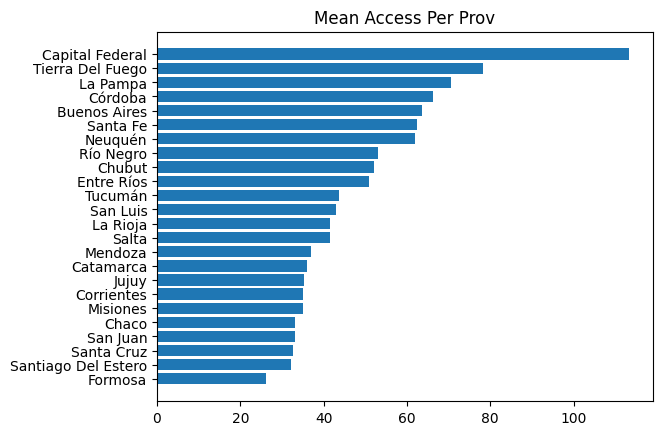

In [131]:
MeanGrowthPerProv()

In [123]:
def MeanGrowthPerYear(provincia):
    x = dt['Accesos por cada 100 hogares'].where(dt['Provincia'] == provincia).groupby(dt['Año']).mean().index
    y = dt['Accesos por cada 100 hogares'].where(dt['Provincia'] == provincia).groupby(dt['Año']).mean().values
    plt.title(f'Mean Growth {provincia}')
    plt.plot(x, y)
    plt.show()

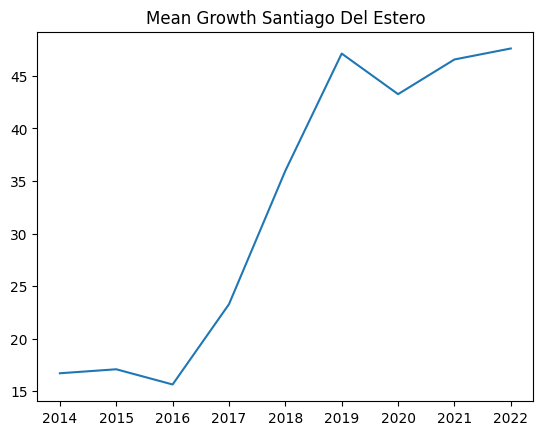

In [124]:
MeanGrowthPerYear('Santiago Del Estero')

In [139]:
dt.to_csv('datasets/KPI_1_Internet_PenetracionPROV.csv', index=False)


<h4>KPI-2 Velocidad media por provincia y trimestre</h4>

In [4]:
dt = pd.read_csv('datasets/historico_velocidad_internetPROV.csv')
dt.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada),Unnamed: 4,Unnamed: 5
0,2022,3,Buenos Aires,70,NaN,NaN
1,2022,3,Capital Federal,101,NaN,NaN
2,2022,3,Catamarca,61,NaN,NaN
3,2022,3,Chaco,53,NaN,NaN
4,2022,3,Chubut,16,NaN,NaN


In [5]:
print(dt.dtypes, dt.shape)

Año                         int64
Trimestre                   int64
Provincia                  object
Mbps (Media de bajada)      int64
Unnamed: 4                float64
Unnamed: 5                float64
dtype: object (840, 6)


In [6]:
dt = dt.drop(columns=['Unnamed: 4', 'Unnamed: 5'])
dt.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,3,Buenos Aires,70
1,2022,3,Capital Federal,101
2,2022,3,Catamarca,61
3,2022,3,Chaco,53
4,2022,3,Chubut,16


In [32]:
def meanSpeedPerProv(anio):
    dtgp = dt.where(dt['Año'] == anio).groupby('Provincia').mean().sort_values(by='Mbps (Media de bajada)')
    plt.barh(dtgp.index, dtgp['Mbps (Media de bajada)'])
    plt.show()

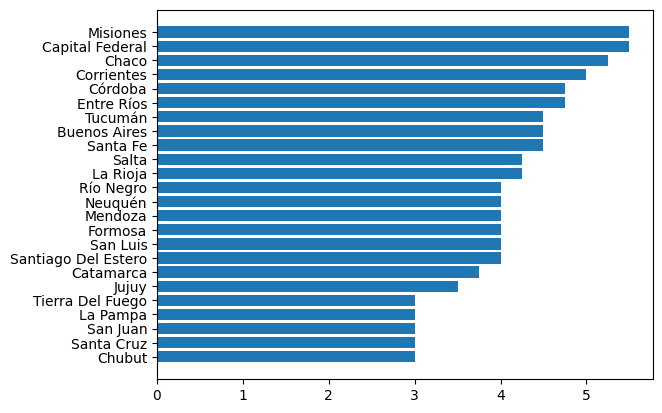

In [36]:
meanSpeedPerProv(2015)

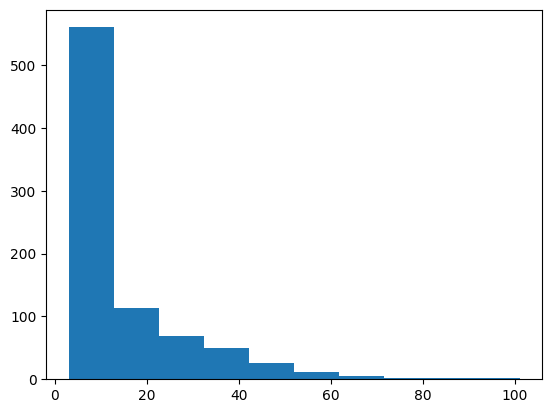

In [38]:
plt.hist(dt['Mbps (Media de bajada)'])
plt.show()

In [39]:
dt.to_csv('datasets/KPI_2_historico_velocidad_internetPROV.csv', index=False)

<h4>KPI-3 Acceso fijo por tecnologia</h4>

In [7]:
dt = pd.read_csv('datasets/Internet_Accesos-por-tecnologiaPROV.csv')
dt.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,3,Buenos Aires,339.648,2.748.325,1.436.433,126.846,70.416,4.721.668
1,2022,3,Capital Federal,140.791,1.240.125,129.218,5.758,31.787,1.547.679
2,2022,3,Catamarca,10.010,10.495,46.224,1.329,2.235,70.293
3,2022,3,Chaco,27.164,61.800,44.645,8.178,2.359,144.146
4,2022,3,Chubut,45.377,72.212,9.574,29.784,8.831,165.778


In [8]:
print(dt.dtypes, dt.shape)

Año              object
Trimestre        object
Provincia        object
ADSL             object
Cablemodem       object
Fibra óptica     object
Wireless        float64
Otros           float64
Total            object
dtype: object (841, 9)


In [9]:
dt.isnull().sum()

Año             0
Trimestre       0
Provincia       1
ADSL            1
Cablemodem      1
Fibra óptica    1
Wireless        1
Otros           1
Total           1
dtype: int64

In [10]:
dt = dt.dropna()

In [11]:
dt.dtypes

Año              object
Trimestre        object
Provincia        object
ADSL             object
Cablemodem       object
Fibra óptica     object
Wireless        float64
Otros           float64
Total            object
dtype: object

In [12]:
dt = dt.astype('string')

In [13]:
col = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']
for atrr in col:
    dt[atrr] = [x.replace('.', '') for x in dt[atrr]]
dt.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,3,Buenos Aires,339648,2748325,1436433,126846,70416,4721668
1,2022,3,Capital Federal,140791,1240125,129218,5758,31787,1547679
2,2022,3,Catamarca,10010,10495,46224,1329,2235,70293
3,2022,3,Chaco,27164,61800,44645,8178,2359,144146
4,2022,3,Chubut,45377,72212,9574,29784,8831,165778


In [14]:
dt = dt.drop(dt[dt['Año'] == '2019 *'].index)
dt.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,3,Buenos Aires,339648,2748325,1436433,126846,70416,4721668
1,2022,3,Capital Federal,140791,1240125,129218,5758,31787,1547679
2,2022,3,Catamarca,10010,10495,46224,1329,2235,70293
3,2022,3,Chaco,27164,61800,44645,8178,2359,144146
4,2022,3,Chubut,45377,72212,9574,29784,8831,165778


In [15]:
col = {'Año':'int64','Trimestre':'int32','ADSL':'int64','Cablemodem':'int64','Fibra óptica':'int64','Wireless':'int64','Otros':'int64','Total':'int64'}
dt = dt.astype(col)

In [16]:
dt.dtypes

Año              int64
Trimestre        int32
Provincia       string
ADSL             int64
Cablemodem       int64
Fibra óptica     int64
Wireless         int64
Otros            int64
Total            int64
dtype: object

In [28]:
dt['ADSL'].where(dt['Año']==2022).sum()

4396850.0

In [43]:
c = dt[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].where((dt['Año']==2022) & (dt['Trimestre']==3)).sum(skipna=True)

In [45]:
def accessAmountPerTecnology(anio, trimestre):
    suma = dt[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].where((dt['Año']==2022) & (dt['Trimestre']==3)).sum(skipna=True)
    plt.title(f'Cantidad de accesos por tecnologia {anio} trim {trimestre}')
    plt.bar(['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros'], suma )
    plt.show

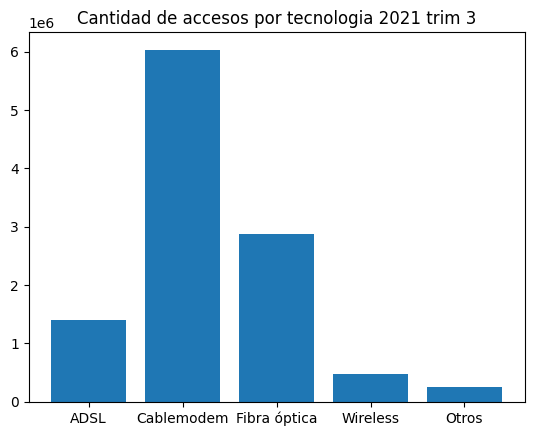

In [46]:
accessAmountPerTecnology(2021,3)

In [47]:
dt.to_csv('datasets/KPI_3_Internet_Accesos-por-tecnologiaPROV.csv', index=False)

<h4>KPI-4 Ingresos</h4>

In [2]:
rev = pd.read_csv('datasets/Internet_IngresosTRIM.csv')
rev.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,3,67.055.930,Jul-Sept 2022
1,2022,2,60.335.724,Abr-Jun 2022
2,2022,1,55.589.997,Ene-Mar 2022
3,2021,4,45.467.887,Oct-Dic 2021
4,2021,3,42.999.944,Jul-Sept 2021


In [78]:
rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Año                        35 non-null     int64 
 1   Trimestre                  35 non-null     int64 
 2   Ingresos (miles de pesos)  35 non-null     object
 3   Periodo                    35 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.2+ KB


In [5]:
usdcot = pd.DataFrame({'years':[2018,2019,2020,2021,2022], 'meanUSD':[37,48,70,94,131]})
usdcot.head()

,years,meanUSD
0,2018,37
1,2019,48
2,2020,70
3,2021,94
4,2022,131


In [7]:
rev['Ingresos (miles de pesos)'] = [x.replace('.','') for x in rev['Ingresos (miles de pesos)']]

In [9]:
rev[rev['Año'] == 2020]

,Año,Trimestre,Ingresos (miles de pesos),Periodo
7,2020,4,33539703,Oct-Dic 2020
8,2020,3,31997445,Jul-Sept 2020
9,2020,2,32102476,Abr-Jun 2020
10,2020,1,29946216,Ene-Mar 2020


In [17]:
rev['Ingresos (miles de pesos)'] = rev['Ingresos (miles de pesos)'].astype('int64')
rev.dtypes

Año                           int64
Trimestre                     int64
Ingresos (miles de pesos)     int64
Periodo                      object
dtype: object

In [24]:
tab = rev['Ingresos (miles de pesos)'].groupby(rev['Año']).mean()

In [40]:
dftab = pd.DataFrame(columns=['Año', 'ingresospesos'])
dftab

,Año,ingresospesos


In [41]:
dftab['Año'] = tab.index
dftab['ingresospesos'] = tab.values
dftab

,Año,ingresospesos
0,2014,3.420987e+06
1,2015,5.027204e+06
2,2016,6.716877e+06
3,2017,9.917993e+06
4,2018,1.488490e+07
5,2019,2.169313e+07
6,2020,3.189646e+07
7,2021,4.084597e+07
8,2022,6.099388e+07


In [49]:
newtab = usdcot.merge(dftab, left_on=usdcot['years'], right_on=dftab['Año'])

In [50]:
newtab.head()

,key_0,years,meanUSD,Año,ingresospesos
0,2018,2018,37,2018,1.488490e+07
1,2019,2019,48,2019,2.169313e+07
2,2020,2020,70,2020,3.189646e+07
3,2021,2021,94,2021,4.084597e+07
4,2022,2022,131,2022,6.099388e+07


In [51]:
newtab['ingresosUSD'] = (newtab['ingresospesos']*1000)/newtab['meanUSD']
newtab

,key_0,years,meanUSD,Año,ingresospesos,ingresosUSD
0,2018,2018,37,2018,1.488490e+07,4.022946e+08
1,2019,2019,48,2019,2.169313e+07,4.519403e+08
2,2020,2020,70,2020,3.189646e+07,4.556637e+08
3,2021,2021,94,2021,4.084597e+07,4.345316e+08
4,2022,2022,131,2022,6.099388e+07,4.656022e+08


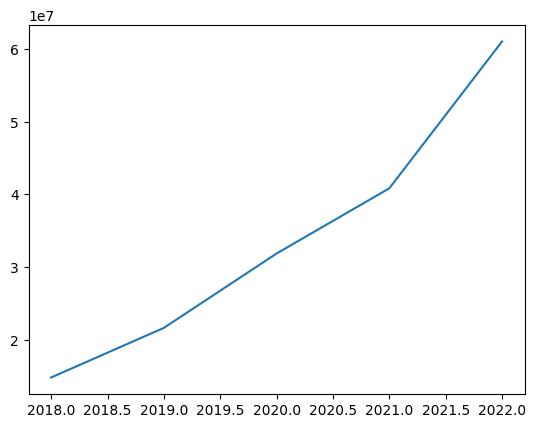

In [52]:
plt.plot(newtab['years'], newtab['ingresospesos'])
plt.show()

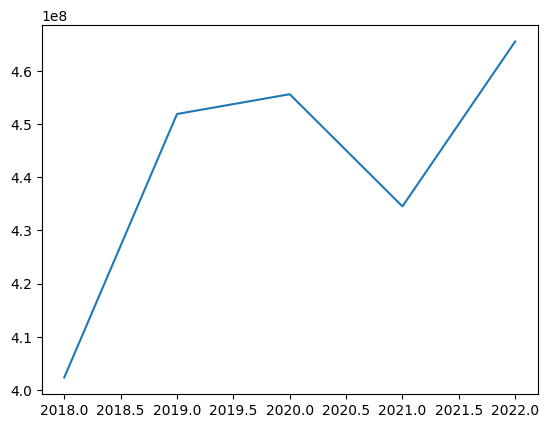

In [53]:
plt.plot(newtab['years'], newtab['ingresosUSD'])
plt.show()

In [55]:
newtab.to_csv('datasets/KPI_4_ingresos.csv', index=False)

<h4>Mapa de conectividad</h4>

In [62]:
mp = pd.read_csv('datasets/mapaconectividad_fijo&movil.csv')
mp.head()

,Provincia,Partido,Localidad,Poblacion,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,SATELITAL,WIRELESS,TELEFONIAFIJA,3G,4G,link,Latitud,Longitud
0,BUENOS AIRES,Bahía Blanca,Villa Bordeau,0,--,--,--,--,--,--,--,SI,SI,6056020.0,"-38,6472605094596","-62,3200223419024"
1,BUENOS AIRES,Bahía Blanca,Villa Espora,0,--,--,--,--,--,--,--,--,--,6056020.0,"-38,7765069529222","-62,1851833537179"
2,BUENOS AIRES,Balcarce,Balcarce,38376,SI,SI,SI,SI,--,SI,SI,SI,SI,6063010.0,"-37,8482779294345","-58,2551665841248"
3,BUENOS AIRES,Balcarce,Los Pinos,337,--,--,--,--,--,SI,SI,--,--,6063020.0,"-37,9412057603","-58,3225920150442"
4,BUENOS AIRES,Balcarce,Napaleofú,374,--,--,--,SI,--,SI,SI,SI,SI,6063030.0,"-37,6254980210026","-58,7461862359423"


In [63]:
mp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      4312 non-null   object 
 1   Partido        4312 non-null   object 
 2   Localidad      4312 non-null   object 
 3   Poblacion      4312 non-null   int64  
 4   ADSL           4312 non-null   object 
 5   CABLEMODEM     4312 non-null   object 
 6   DIALUP         4312 non-null   object 
 7   FIBRAOPTICA    4312 non-null   object 
 8   SATELITAL      4312 non-null   object 
 9   WIRELESS       4312 non-null   object 
 10  TELEFONIAFIJA  4312 non-null   object 
 11  3G             4312 non-null   object 
 12  4G             4312 non-null   object 
 13  link           4300 non-null   float64
 14  Latitud        4312 non-null   object 
 15  Longitud       4312 non-null   object 
dtypes: float64(1), int64(1), object(14)
memory usage: 539.1+ KB


In [64]:
atrr = ['ADSL', 'CABLEMODEM', 'DIALUP', 'FIBRAOPTICA','SATELITAL','WIRELESS','TELEFONIAFIJA','3G','4G']
for x in atrr:
   mp[x] = mp[x].map({'SI':True,'--':False})
   mp[x] = mp[x].astype('bool')

In [65]:
mp.head()

,Provincia,Partido,Localidad,Poblacion,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,SATELITAL,WIRELESS,TELEFONIAFIJA,3G,4G,link,Latitud,Longitud
0,BUENOS AIRES,Bahía Blanca,Villa Bordeau,0,False,False,False,False,False,False,False,True,True,6056020.0,"-38,6472605094596","-62,3200223419024"
1,BUENOS AIRES,Bahía Blanca,Villa Espora,0,False,False,False,False,False,False,False,False,False,6056020.0,"-38,7765069529222","-62,1851833537179"
2,BUENOS AIRES,Balcarce,Balcarce,38376,True,True,True,True,False,True,True,True,True,6063010.0,"-37,8482779294345","-58,2551665841248"
3,BUENOS AIRES,Balcarce,Los Pinos,337,False,False,False,False,False,True,True,False,False,6063020.0,"-37,9412057603","-58,3225920150442"
4,BUENOS AIRES,Balcarce,Napaleofú,374,False,False,False,True,False,True,True,True,True,6063030.0,"-37,6254980210026","-58,7461862359423"


In [66]:
mp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      4312 non-null   object 
 1   Partido        4312 non-null   object 
 2   Localidad      4312 non-null   object 
 3   Poblacion      4312 non-null   int64  
 4   ADSL           4312 non-null   bool   
 5   CABLEMODEM     4312 non-null   bool   
 6   DIALUP         4312 non-null   bool   
 7   FIBRAOPTICA    4312 non-null   bool   
 8   SATELITAL      4312 non-null   bool   
 9   WIRELESS       4312 non-null   bool   
 10  TELEFONIAFIJA  4312 non-null   bool   
 11  3G             4312 non-null   bool   
 12  4G             4312 non-null   bool   
 13  link           4300 non-null   float64
 14  Latitud        4312 non-null   object 
 15  Longitud       4312 non-null   object 
dtypes: bool(9), float64(1), int64(1), object(5)
memory usage: 273.8+ KB


In [67]:
correl = mp.corr()

/tmp/ipykernel_9368/3553150430.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correl = mp.corr()


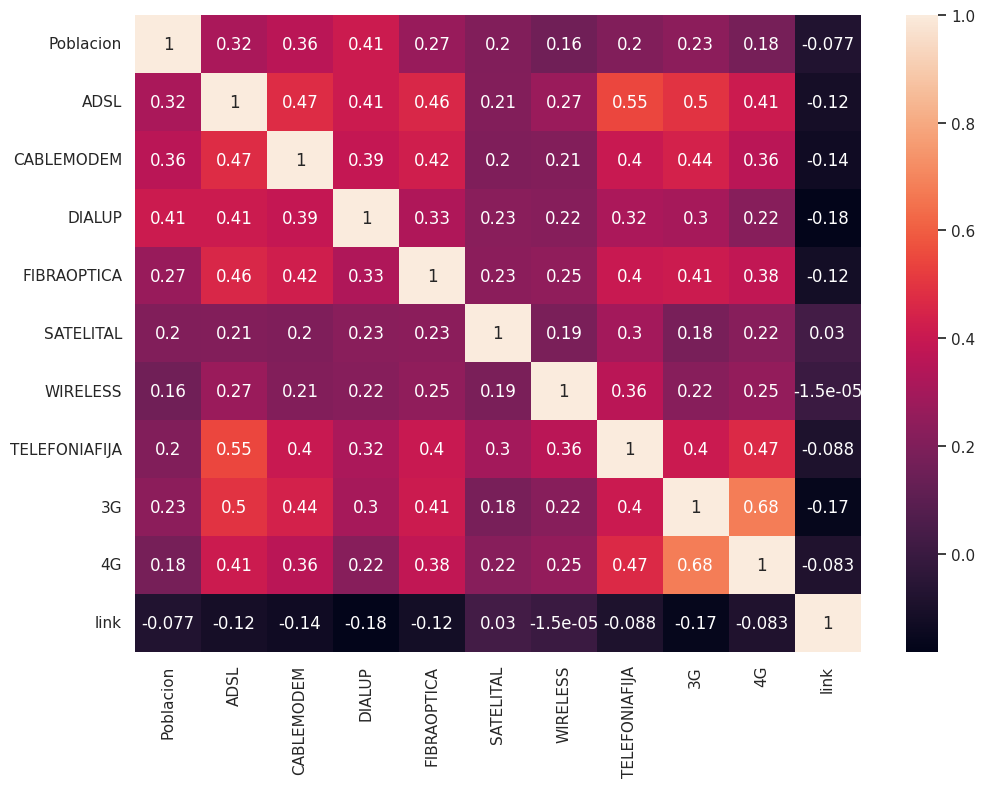

In [70]:

sns.heatmap(correl, annot=True)
sns.set(rc={'figure.figsize':(15,15)})

<p>Poblaciones mas pequeñas acceden a mas internet movil que fijo.</p>

In [78]:
mp['Poblacion'].groupby(mp['Provincia']).sum().sort_values()

Provincia
TIERRA DEL FUEGO         125823
SANTA CRUZ               268436
LA PAMPA                 302570
LA RIOJA                 319248
CATAMARCA                343343
SAN LUIS                 410669
FORMOSA                  452714
CHUBUT                   490554
NEUQUEN                  522527
RIO NEGRO                597058
JUJUY                    628141
SAN JUAN                 631000
SANTIAGO DEL ESTERO      671932
MISIONES                 836097
CORRIENTES               857994
CHACO                    927414
SALTA                   1117163
ENTRE RIOS              1119919
TUCUMAN                 1210114
MENDOZA                 1654993
CABA                    2890151
SANTA FE                3055611
CORDOBA                 3139606
BUENOS AIRES           14911542
Name: Poblacion, dtype: int64

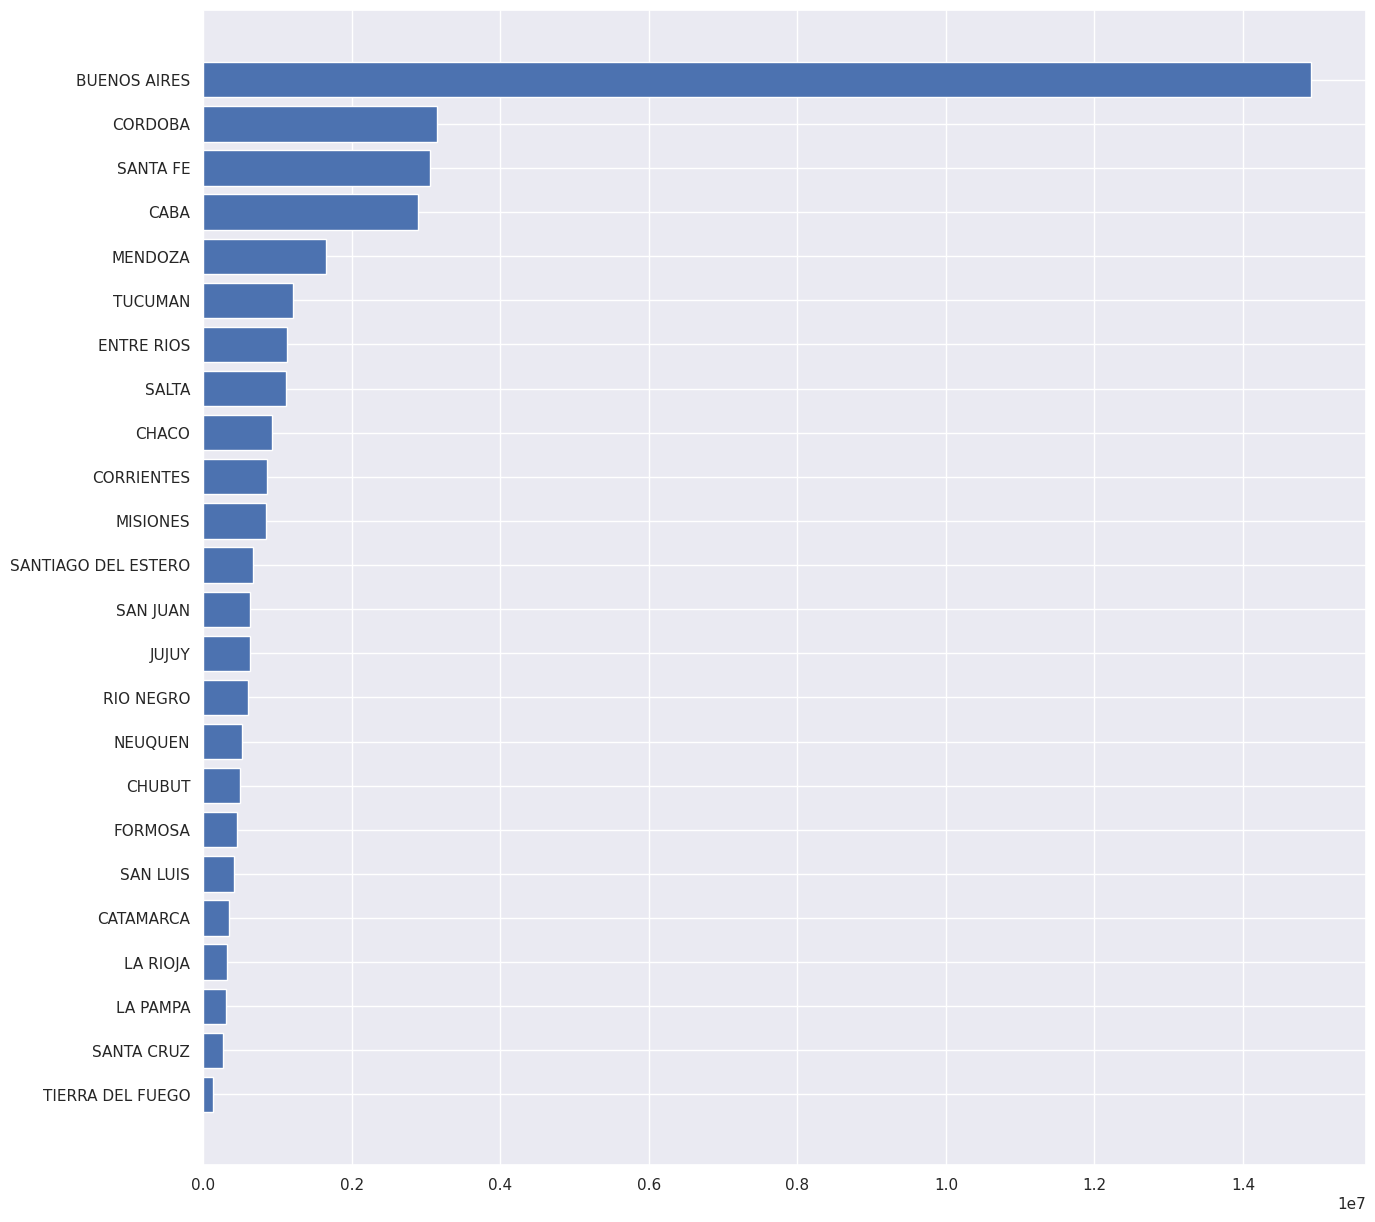

In [80]:
plt.barh(mp['Poblacion'].groupby(mp['Provincia']).sum().sort_values().index, mp['Poblacion'].groupby(mp['Provincia']).sum().sort_values().values)
plt.show()

In [ ]:
mp.to_csv('datasets/K_mapaconectividad_fija_movil.csv', index=False)